<font size=6><b>brain tumor canseer</b></font>

<font seize='3'>Dataset Overview:

The dataset consists of several important features that help classify tumors into benign or malignant categories. Below are some of the key attributes:
Diagnosis: This column indicates whether the tumor is benign (B) or malignant (M). It is the target variable we aim to predict.
Radius Mean: This feature measures the mean radius of the tumor cells. It is a crucial factor that often correlates with the size of the tumor.
Texture Mean: This feature represents the mean texture of the tumor, which is calculated from gray-scale values in the images. The texture can provide insights into the malignancy of the tumor.
Perimeter Mean: Similar to radius, the perimeter measures how far around the tumor is. A higher perimeter might indicate a larger and potentially more dangerous tumor.
Area Mean: This represents the area occupied by the tumor. The size of the tumor is an essential aspect when determining its potential threat.
Smoothness Mean: This feature measures the smoothness of the tumor surface. Tumors with a rough surface texture can often be more aggressive.
Compactness Mean: This feature describes the shape of the tumor; higher values indicate a more compact (and potentially dangerous) tumor shape.
These features collectively provide a comprehensive view to help healthcare professionals and researchers accurately determine the nature of the tumors and apply appropriate treatments.</font>>

<font size="3">Importing Required Libraries:

In this section, we import the necessary libraries for data handling, visualization, preprocessing, and building the deep learning model.</font>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.metrics import classification_report , accuracy_score , f1_score , confusion_matrix , precision_score , recall_score , roc_curve, auc
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense , Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.random.set_seed(42)
np.random.seed(42)

<font size=3>Loading and Exploring the Dataset

We load the dataset and check its structure. This helps us understand what kind of data we are working with.</font>

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<font size=3> Exploratory Data Analysis (EDA)

In this section, we check the basic structure of the dataset and look for missing values or abnormal data.
</font>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.shape

(569, 33)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<font size="3">Dataset Statistical Summary Description:

The statistical summary of the brain cancer dataset provides an overview of the key characteristics and metrics associated with the data. This summary includes essential statistical measures such as:
Count: The number of observations in each feature of the dataset, indicating the completeness of data.
Mean: The average value of each feature, helping to understand the typical magnitude of the data points.
Standard Deviation: A measure of the variability or dispersion of the data points from the mean, indicating the degree of spread or concentration.
Minimum: The smallest value recorded for each feature, giving insight into the lower bounds of the dataset.
25th Percentile (Q1): The value below which 25% of the data falls, providing an understanding of the lower quartile.
50th Percentile (Median): The middle value of the dataset, showcasing the central tendency of the feature.
75th Percentile (Q3): The value below which 75% of the data falls, helping to assess the upper quartile.
Maximum: The largest value observed for each feature, revealing the upper limits of the dataset.
This statistical summary is crucial for understanding the distribution of features within the dataset, aiding in the identification of patterns and anomalies that may impact the classification of tumors as benign or malignant.</font

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
## This code snippet applies Label Encoding to the 'diagnosis' column 
## of the brain cancer dataset. The 'diagnosis' column contains 
## categorical values (e.g., 'B' for benign and 'M' for malignant). 
## The Label Encoder will convert these categorical labels into 
## numeric format, allowing for easier processing during model training.
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [ ]:
## This code calculates the correlation matrix for the features in the brain cancer dataset. 
## The correlation matrix provides insights into the relationships between different variables, 
## indicating how strongly they are associated with one another. 
## This information can be valuable for understanding feature interactions and 
## may inform feature selection for model training
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


In [ ]:
## This code selects the independent features (X) and the target variable (y) 
## from the brain cancer dataset. 'X' includes all the relevant features used for prediction, 
## while 'y' contains the target values indicating the tumor type (benign or malignant).
X = data.iloc[:,2:-1]
y = data['diagnosis']

<font size=3>class weights</font>

In [12]:
np.unique(y , return_counts=True)

(array([0, 1]), array([357, 212], dtype=int64))

<font size=3>Splitting Data into Training and Testing Sets

We split the dataset into training and testing sets using a fixed random seed for reproducibility.</font>


In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

<font size=3>scale and normalize data</font>

In [14]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

<font size=3>Define the architecture of the deep learning model</font>

In [16]:
model = Sequential()
model.add(Dense(128 , activation='relu', input_shape=(30,)))
model.add(Dropout(0.2))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<font size=3>Model Training
We use a neural network model built with TensorFlow to classify tumors as malignant or benign.
</font>

In [17]:
history = model.fit(X_train , y_train , epochs=20 , validation_data=(X_test , y_test) , batch_size=10)

Epoch 1/20
46/46 [==============================] - 1s 4ms/step - loss: 0.6343 - accuracy: 0.6615 - val_loss: 0.4955 - val_accuracy: 0.9035
Epoch 2/20
46/46 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8637 - val_loss: 0.2973 - val_accuracy: 0.9386
Epoch 3/20
46/46 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8923 - val_loss: 0.2047 - val_accuracy: 0.9474
Epoch 4/20
46/46 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.8945 - val_loss: 0.1664 - val_accuracy: 0.9474
Epoch 5/20
46/46 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9099 - val_loss: 0.1337 - val_accuracy: 0.9561
Epoch 6/20
46/46 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9275 - val_loss: 0.1132 - val_accuracy: 0.9649
Epoch 7/20
46/46 [==============================] - 0s 1ms/step - loss: 0.1937 - accuracy: 0.9319 - val_loss: 0.1465 - val_accuracy: 0.9386
Epoch 8/20
46/46 [==

<font size=3>Evaluating the Model

We evaluate the trained model on the test data using accuracy, precision, recall, and confusion matrix to understand its performance.

And 

Visualizing Results

We visualize accuracy, loss, and the confusion matrix to better understand the performance of the model.</font>

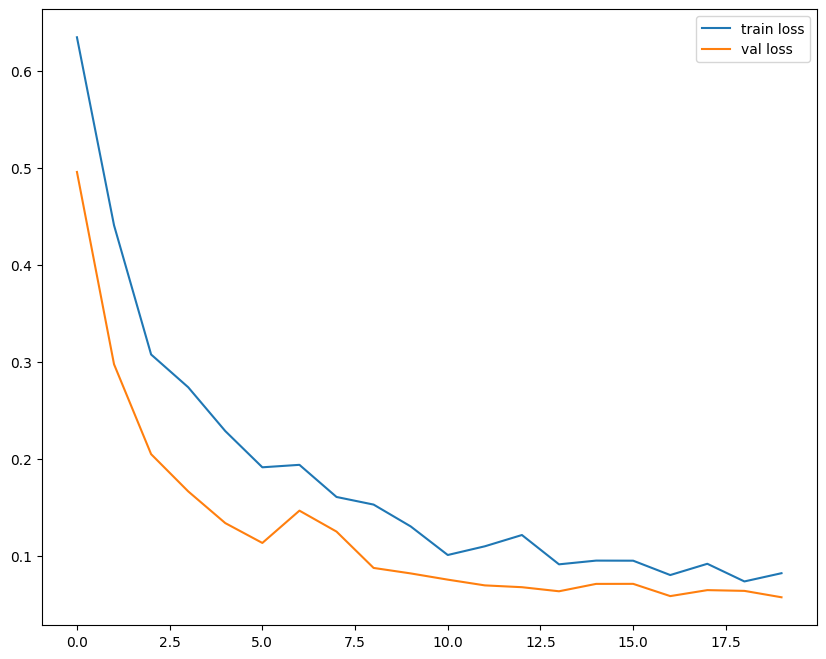

4/4 [==============================] - 0s 0s/step - loss: 0.0572 - accuracy: 0.9737
loss: 0.05723614618182182
accuracy: 0.9736841917037964
4/4 [==============================] - 0s 5ms/step
[[69  2]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

# 4. Model Evaluation
# 4.1 Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("loss:",loss)
print("accuracy:",accuracy)

# 4.2 Confusion Matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 4.3 Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

# 5. Model Saving
model.save('brain_tumor_canseer.h5')



<font size=3>f1 score , precision , recall and accuracy</font>

In [19]:
print(f"""f1_score : {f1_score(y_test , y_pred)} 
precision : {precision_score(y_test , y_pred)}
recall : {recall_score(y_test , y_pred)}
accuracy_score : {accuracy_score(y_test , y_pred)}""")

f1_score : 0.9655172413793104 
precision : 0.9545454545454546
recall : 0.9767441860465116
accuracy_score : 0.9736842105263158


<font size="3">Model Evaluation Results:

The evaluation metrics for the trained model are as follows:

F1 Score: 0.9655
This score indicates a high balance between precision and recall, suggesting that the model performs well in identifying both classes.

Precision: 0.9545

This value reflects that around 95.45% of the instances predicted as positive are indeed positive, demonstrating the model's effectiveness in minimizing false positives.

Recall: 0.9767

The recall score indicates that the model captures approximately 97.67% of all actual positive cases, showing its strength in identifying true positives.

Accuracy Score: 0.9737

The overall accuracy of the model is approximately 97.37%, meaning that the model correctly classifies around 97.37% of the total instances in the test dataset.</font

<font size=3>ROC Curve

This ROC Curve visualizes the performance of the trained model at various threshold settings. The curve illustrates the trade-off between the True Positive Rate (Recall) and the False Positive Rate across different classification thresholds. A model with a perfect classification capability would have a curve that follows the left-hand border and then the top border of the ROC space, resulting in an area under the curve (AUC) of 1.0. The closer the curve is to the top left corner, the better the model's performance.</font>

4/4 [==============================] - 0s 0s/step


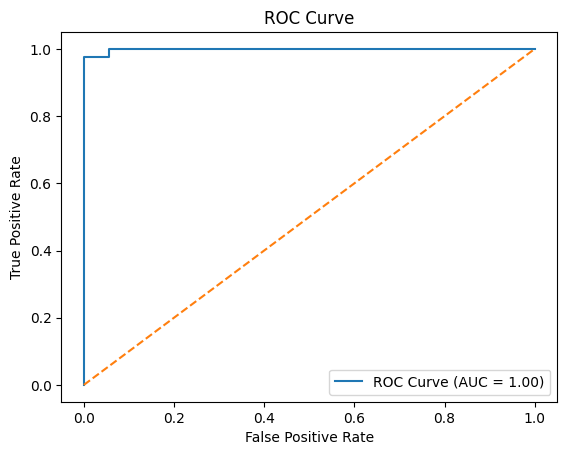

In [ ]:
y_probs = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<font size=3>confusion matrix visualization</font>

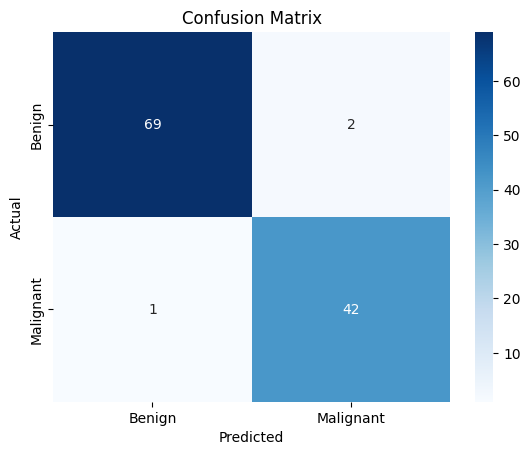

In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot=True ,cmap='Blues' , xticklabels=['Benign','Malignant'] , yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<font size=4>Our neural network achieved an impressive accuracy of 97.3% in classifying tumors, highlighting its effectiveness in this critical task. Both precision and recall scores stand at 0.97, indicating that the model reliably identifies tumors while minimizing false positives and maximizing true positives. The AUC-ROC score of 1.00 reflects exceptional separability, demonstrating that the model can distinctly differentiate between various tumor types. These results not only showcase the model's strength but also suggest its potential for assisting in early diagnosis and treatment planning, making a significant contribution to the field of medical imaging.</font>